# Loading the Data

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
# For handling string
import string
# For performing mathematical operations
import math
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data=pd.read_csv('HIGGS_6M.csv')
data.head(10)

,1.00E+00,8.69E-01,-6.35E-01,2.26E-01,3.27E-01,-6.90E-01,7.54E-01,-2.49E-01,-1.09E+00,0.00E+00,...,-1.05E-02,-4.58E-02,3.10E+00,1.35E+00,9.80E-01,9.78E-01,9.20E-01,7.22E-01,9.89E-01,8.77E-01
0,1.0,0.908,0.329,0.35900,1.500,-0.313,1.100,-0.5580,-1.5900,2.17,...,-1.1400,-0.000819,0.0,0.302,0.833,0.986,0.978,0.780,0.992,0.798
1,1.0,0.799,1.470,-1.64000,0.454,0.426,1.100,1.2800,1.3800,0.00,...,1.1300,0.900000,0.0,0.910,1.110,0.986,0.951,0.803,0.866,0.780
2,0.0,1.340,-0.877,0.93600,1.990,0.882,1.790,-1.6500,-0.9420,0.00,...,-0.6780,-1.360000,0.0,0.947,1.030,0.999,0.728,0.869,1.030,0.958
3,1.0,1.110,0.321,1.52000,0.883,-1.210,0.681,-1.0700,-0.9220,0.00,...,-0.3740,0.113000,0.0,0.756,1.360,0.987,0.838,1.130,0.872,0.808
4,0.0,1.600,-0.608,0.00707,1.820,-0.112,0.848,-0.5660,1.5800,2.17,...,-0.6540,-1.270000,3.1,0.824,0.938,0.972,0.789,0.431,0.961,0.958
5,1.0,0.409,-1.880,-1.03000,1.670,-1.600,1.340,0.0554,0.0135,2.17,...,0.0695,1.380000,3.1,0.869,1.220,1.000,0.545,0.699,0.977,0.829
6,1.0,0.934,0.629,0.52800,0.238,-0.967,0.548,-0.0594,-1.7100,2.17,...,1.2900,-1.470000,0.0,0.902,1.080,0.980,0.783,0.849,0.894,0.775
7,1.0,1.410,0.537,0.69000,1.180,-0.110,3.200,-1.5300,-1.5800,0.00,...,-0.1510,1.160000,0.0,1.670,4.040,1.180,1.050,1.540,3.530,2.740
8,1.0,1.180,0.104,1.40000,0.480,0.266,1.140,1.5300,-0.2530,0.00,...,0.2690,0.530000,0.0,0.833,0.774,0.986,1.100,0.849,0.937,0.812
9,1.0,0.946,1.110,1.22000,0.908,0.822,1.150,-0.3650,-1.5700,0.00,...,-0.4510,0.063700,3.1,0.829,0.981,0.994,0.908,0.776,0.783,0.725


In [3]:
#labeling the dataset
data.columns = ['Label', 'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','f1','f2','f3','f4','f5','f6','f7']
data.head(10)

,Label,a,b,c,d,e,f,g,h,i,...,s,t,u,f1,f2,f3,f4,f5,f6,f7
0,1.0,0.908,0.329,0.35900,1.500,-0.313,1.100,-0.5580,-1.5900,2.17,...,-1.1400,-0.000819,0.0,0.302,0.833,0.986,0.978,0.780,0.992,0.798
1,1.0,0.799,1.470,-1.64000,0.454,0.426,1.100,1.2800,1.3800,0.00,...,1.1300,0.900000,0.0,0.910,1.110,0.986,0.951,0.803,0.866,0.780
2,0.0,1.340,-0.877,0.93600,1.990,0.882,1.790,-1.6500,-0.9420,0.00,...,-0.6780,-1.360000,0.0,0.947,1.030,0.999,0.728,0.869,1.030,0.958
3,1.0,1.110,0.321,1.52000,0.883,-1.210,0.681,-1.0700,-0.9220,0.00,...,-0.3740,0.113000,0.0,0.756,1.360,0.987,0.838,1.130,0.872,0.808
4,0.0,1.600,-0.608,0.00707,1.820,-0.112,0.848,-0.5660,1.5800,2.17,...,-0.6540,-1.270000,3.1,0.824,0.938,0.972,0.789,0.431,0.961,0.958
5,1.0,0.409,-1.880,-1.03000,1.670,-1.600,1.340,0.0554,0.0135,2.17,...,0.0695,1.380000,3.1,0.869,1.220,1.000,0.545,0.699,0.977,0.829
6,1.0,0.934,0.629,0.52800,0.238,-0.967,0.548,-0.0594,-1.7100,2.17,...,1.2900,-1.470000,0.0,0.902,1.080,0.980,0.783,0.849,0.894,0.775
7,1.0,1.410,0.537,0.69000,1.180,-0.110,3.200,-1.5300,-1.5800,0.00,...,-0.1510,1.160000,0.0,1.670,4.040,1.180,1.050,1.540,3.530,2.740
8,1.0,1.180,0.104,1.40000,0.480,0.266,1.140,1.5300,-0.2530,0.00,...,0.2690,0.530000,0.0,0.833,0.774,0.986,1.100,0.849,0.937,0.812
9,1.0,0.946,1.110,1.22000,0.908,0.822,1.150,-0.3650,-1.5700,0.00,...,-0.4510,0.063700,3.1,0.829,0.981,0.994,0.908,0.776,0.783,0.725


In [4]:
# Getting last 500k rows from data
df = data.iloc[-500000:]

# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 548575 to 1048574
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Label   500000 non-null  float64
 1   a       500000 non-null  float64
 2   b       500000 non-null  float64
 3   c       500000 non-null  float64
 4   d       500000 non-null  float64
 5   e       500000 non-null  float64
 6   f       500000 non-null  float64
 7   g       500000 non-null  float64
 8   h       500000 non-null  float64
 9   i       500000 non-null  float64
 10  j       500000 non-null  float64
 11  k       500000 non-null  float64
 12  l       500000 non-null  float64
 13  m       500000 non-null  float64
 14  n       500000 non-null  float64
 15  o       500000 non-null  float64
 16  p       500000 non-null  float64
 17  q       500000 non-null  float64
 18  r       500000 non-null  float64
 19  s       500000 non-null  float64
 20  t       500000 non-null  float64
 21  u   

In [6]:
df.describe()

,Label,a,b,c,d,e,f,g,h,i,...,s,t,u,f1,f2,f3,f4,f5,f6,f7
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.529866,0.990204,0.002254,-0.001055,0.998281,-0.000121,0.991422,0.001087,0.000404,0.998112,...,-0.000552,-0.000571,0.999235,1.035067,1.025749,1.050189,1.009589,0.973340,1.033758,0.960130
std,0.499108,0.564540,1.009146,1.005989,0.598587,1.006856,0.475389,1.010417,1.005639,1.026094,...,1.007341,1.006110,1.399361,0.680033,0.383375,0.163852,0.397727,0.525215,0.365905,0.313452
min,0.000000,0.275000,-2.430000,-1.740000,0.002250,-1.740000,0.140000,-2.970000,-1.740000,0.000000,...,-2.500000,-1.740000,0.000000,0.101000,0.235000,0.202000,0.186000,0.066600,0.329000,0.351000
25%,0.000000,0.590000,-0.736000,-0.873000,0.575000,-0.871000,0.679000,-0.687000,-0.868000,0.000000,...,-0.714000,-0.871000,0.000000,0.791000,0.847000,0.986000,0.767000,0.674000,0.819000,0.770000
50%,1.000000,0.852000,0.003840,-0.000796,0.892000,-0.000166,0.894000,0.002950,0.001820,1.090000,...,0.000372,-0.004700,0.000000,0.895000,0.951000,0.990000,0.916000,0.874000,0.948000,0.872000
75%,1.000000,1.240000,0.738000,0.868000,1.290000,0.871000,1.170000,0.691000,0.869000,2.170000,...,0.714000,0.872000,3.100000,1.020000,1.080000,1.020000,1.140000,1.140000,1.140000,1.060000
max,1.000000,7.810000,2.430000,1.740000,9.270000,1.740000,7.630000,2.970000,1.740000,2.170000,...,2.500000,1.740000,3.100000,31.100000,15.600000,5.550000,10.800000,12.200000,8.780000,6.180000


In [7]:
# Checking dimention of data
df.shape

(500000, 29)

In [8]:
#to see any null value present in our dataset
df.isnull().sum().max()

0

### No null values present

Text(0, 0.5, 'no of samples')

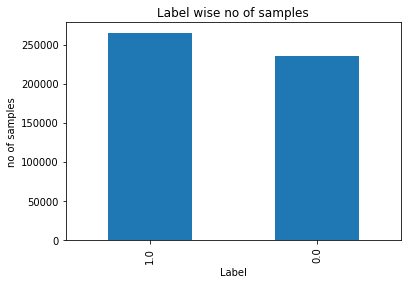

In [9]:
df['Label'].value_counts().plot.bar()
# Add title and axis names
plt.title('Label wise no of samples')
plt.xlabel('Label')
plt.ylabel('no of samples')

<AxesSubplot:ylabel='Label'>

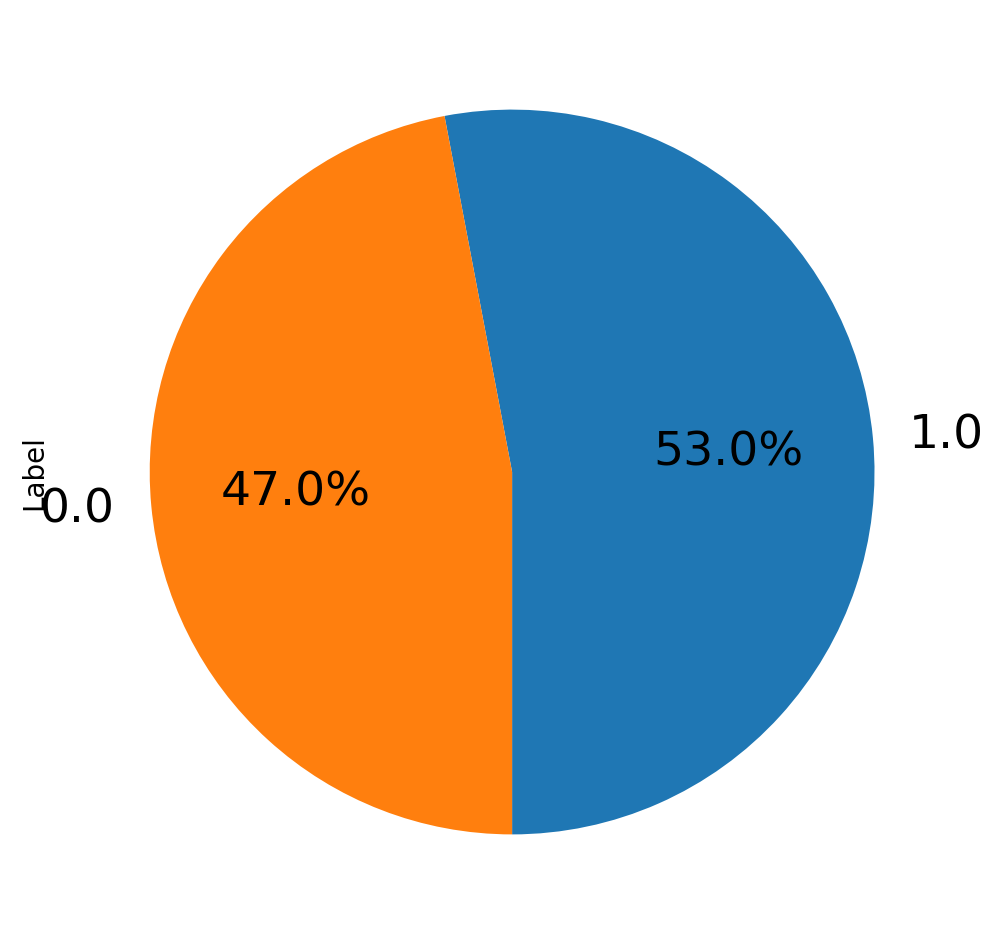

In [10]:
fig = plt.figure(figsize=(6,6), dpi=200)
ax = plt.subplot(111)

df['Label'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

### We can see Dataset is  quite balanced

In [11]:
df.columns

Index(['Label', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7'],
      dtype='object')

# Dimensionality Reduction Techniques

## 1.Low Variance filter

In [12]:
df.var()

Label    0.249109
a        0.318705
b        1.018375
c        1.012015
d        0.358306
e        1.013759
f        0.225994
g        1.020942
h        1.011310
i        1.052869
j        0.249123
k        1.018604
l        1.013396
m        1.096295
n        0.236653
o        1.016057
p        1.011552
q        1.424713
r        0.256843
s        1.014735
t        1.012258
u        1.958212
f1       0.462445
f2       0.146976
f3       0.026848
f4       0.158187
f5       0.275850
f6       0.133886
f7       0.098252
dtype: float64

In [13]:
# 'f3' & 'f7'  columns have the lowest variance so they need to be dropped
df.drop(['f3', 'f7'], axis=1, inplace=True)

# 2.High correlation filter

## Correlation Matrix plot

Text(0.5, 1.0, ' Correlation Matrix \n ')

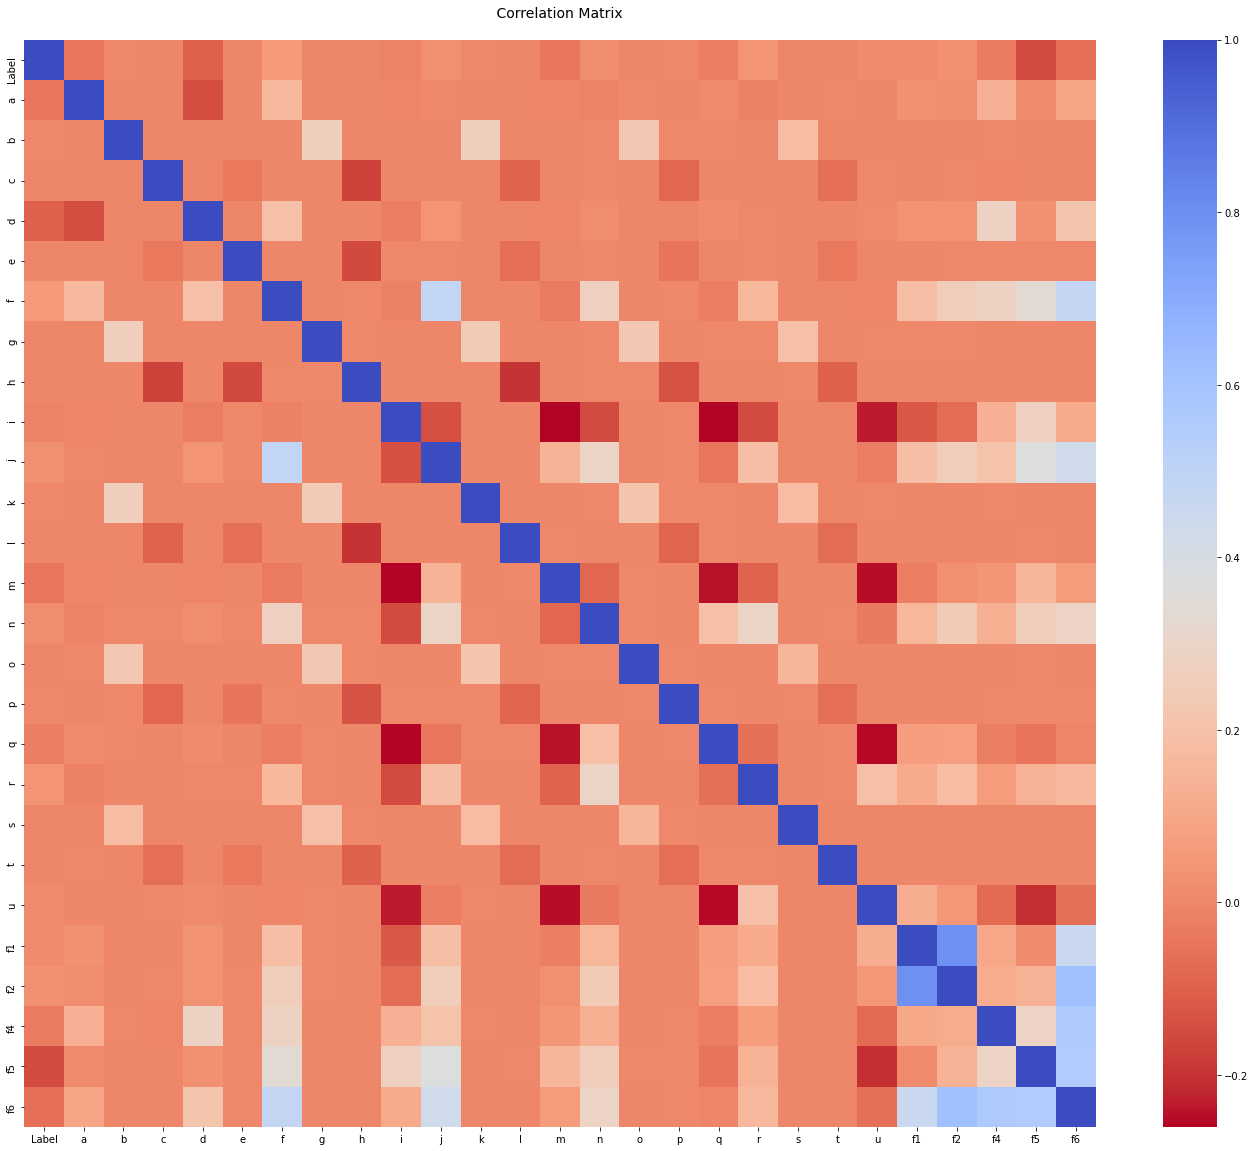

In [14]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title(" Correlation Matrix \n ", fontsize=14)

In [15]:
corr

,Label,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,f1,f2,f4,f5,f6
Label,1.000000,-0.045865,0.001818,-0.000292,-0.100322,0.000166,0.057585,0.000263,0.000583,-0.011949,...,-0.023786,0.038260,-0.000149,-0.000612,0.013849,0.013918,0.027654,-0.031217,-0.150593,-0.063765
a,-0.045865,1.000000,-0.001386,0.000189,-0.143408,0.000161,0.165981,-0.000445,-0.001232,-0.004190,...,0.006365,-0.018113,-0.003656,0.001527,0.000228,0.025936,0.017213,0.132295,0.006823,0.092941
b,0.001818,-0.001386,1.000000,-0.000168,0.000423,-0.000944,-0.001465,0.264814,-0.000154,-0.001838,...,0.001337,0.000716,0.178630,-0.000864,0.000637,0.000241,0.000562,0.000858,-0.002854,-0.001211
c,-0.000292,0.000189,-0.000168,1.000000,-0.000961,-0.043260,-0.001068,-0.000340,-0.168623,-0.002714,...,-0.000997,0.000045,0.000179,-0.064091,0.000832,0.000795,0.001220,-0.004642,-0.001529,-0.002268
d,-0.100322,-0.143408,0.000423,-0.000961,1.000000,-0.000599,0.196284,-0.001193,-0.000110,-0.028721,...,0.012522,0.003468,-0.000826,-0.002077,0.007783,0.032003,0.030516,0.278793,0.026117,0.212501
e,0.000166,0.000161,-0.000944,-0.043260,-0.000599,1.000000,0.000166,-0.002071,-0.152733,0.002117,...,-0.000051,0.001003,-0.002726,-0.038667,-0.002051,-0.000451,0.001451,0.002741,0.001720,0.001574
f,0.057585,0.165981,-0.001465,-0.001068,0.196284,0.000166,1.000000,0.000140,0.001053,-0.015606,...,-0.024945,0.162076,-0.004024,-0.000598,-0.007047,0.183703,0.258185,0.280129,0.337016,0.480574
g,0.000263,-0.000445,0.264814,-0.000340,-0.001193,-0.002071,0.000140,1.000000,0.001154,-0.001044,...,0.002388,0.001510,0.194459,-0.000569,0.001370,0.002797,0.002364,-0.002068,0.000373,0.000431
h,0.000583,-0.001232,-0.000154,-0.168623,-0.000110,-0.152733,0.001053,0.001154,1.000000,-0.000309,...,-0.001458,-0.001367,0.002120,-0.102106,0.000773,-0.000388,0.000232,-0.000893,-0.001237,-0.001423
i,-0.011949,-0.004190,-0.001838,-0.002714,-0.028721,0.002117,-0.015606,-0.001044,-0.000309,1.000000,...,-0.255611,-0.147396,-0.001817,-0.000095,-0.234212,-0.117378,-0.072860,0.132081,0.269891,0.110108


### Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

In [16]:
#  'f','f1','f2','f6' these columns are highly correlated to each other so we need to drop this
df.drop(['f', 'f1','f2','f6'], axis=1, inplace=True)

In [17]:
x_data = df.drop('Label', axis=1)
y = df['Label']

In [18]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [19]:
#split train & test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

# 3.Random forest Feature importance

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(x_train.T, y_train.T)

acc = rfc.score(x_test.T,y_test.T)*100

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 68.38%


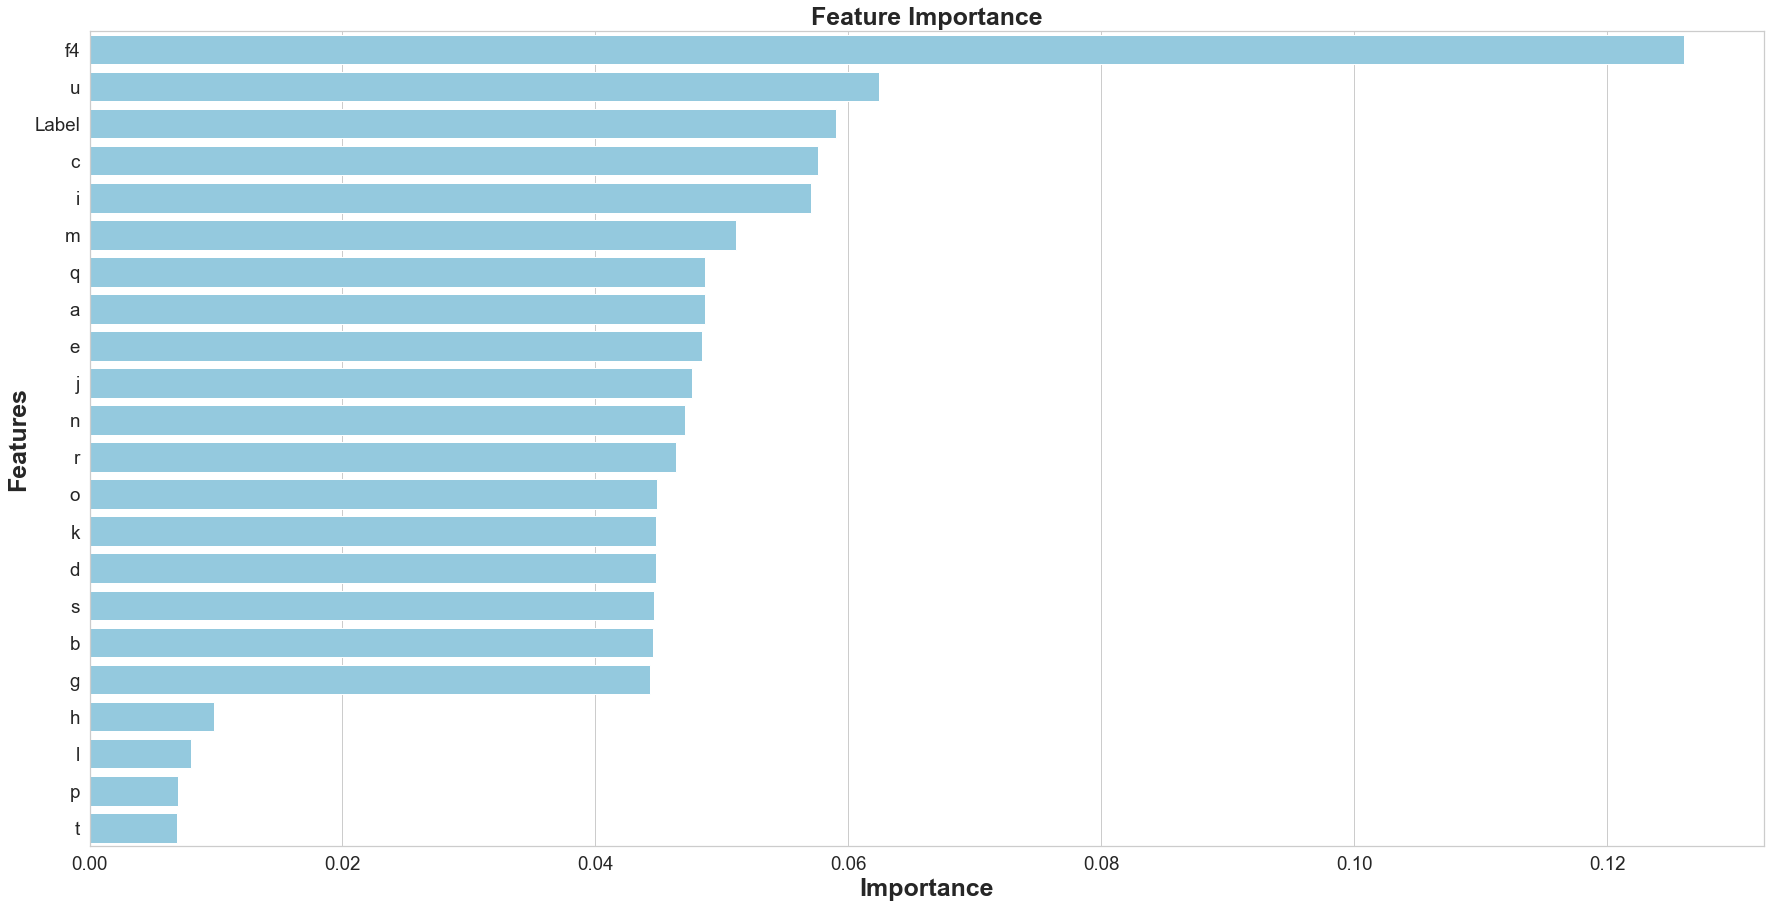

None

,Features,Gini-Importance
0,f4,0.126073
1,u,0.062416
2,Label,0.059063
3,c,0.057620
4,i,0.057018
5,m,0.051112
6,q,0.048682
7,a,0.048662
8,e,0.048449
9,j,0.047648


In [23]:
feats = {}
for feature, importance in zip(df.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

 'h','i','p','t' these columns have lower Gini importance value so we need to drop these 

In [27]:
x_train.T.drop(['h', 'i','p','t'], axis=1, inplace=True)

In [28]:
x_test.T.drop(['h', 'i','p','t'], axis=1, inplace=True)

# Classification Models

### Logistic Regression

In [29]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 59.95%


### After Applying Several Dimensionality Reduction techniques accuracy of logistic regression model has decresed from 64.12 to 59.95 %

#  4.Principal Component Analysis

In [30]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train.T)
X_test = sc_X.fit_transform(x_test.T)

In [31]:
# import the pca model
from sklearn.decomposition import PCA

In [32]:
# init the PCA model
pca = PCA(n_components = 2)       # n_compent is 2 on the basis of high variance
# fitting the feature metric data into PCA model
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [33]:
# explain the variance
explained_varience = pca.explained_variance_ratio_
explained_varience

array([0.08988807, 0.08487855])

# Combining PCA with Logistic Regression Model

In [34]:
# import the logistic regression model from scikit learn
from sklearn.linear_model import LogisticRegression

# initialize the logistic regression model
classifier = LogisticRegression(random_state = 0)
# fitting the logistic regression model to the training  set
classifier.fit(X_train, y_train.T)

LogisticRegression(random_state=0)

In [35]:
# making the prediction of test test set result
y_pred = classifier.predict(X_test)

In [36]:
# making a confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matric = confusion_matrix(y_test.T, y_pred)
confusion_matric

array([[ 8071, 38804],
       [ 6204, 46921]], dtype=int64)

In [37]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test.T, y_pred)
accuracy

0.54992

# ROC-AUC Curve

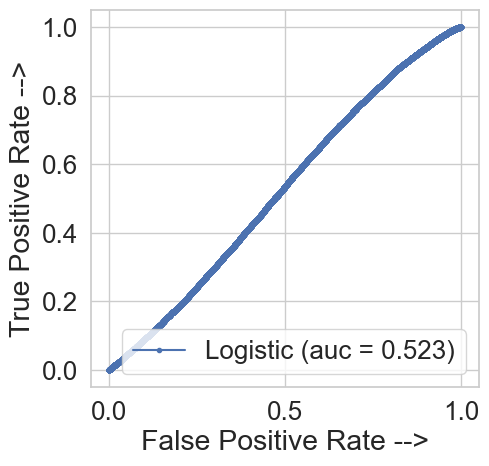

In [38]:
from sklearn.metrics import roc_curve, auc

y_pred_logistic_pca = classifier.decision_function(X_test)

logistic_fpr_pca, logistic_tpr_pca, threshold = roc_curve(y_test.T, y_pred_logistic_pca)
auc_logistic_pca = auc(logistic_fpr_pca, logistic_tpr_pca)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr_pca, logistic_tpr_pca, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic_pca)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### ROC-AUC Score of Logistic Regression with PCA dimensionality Reduction is 0.523   & Accuracy 0.54992


# 5.Truncated Single Value Decomposition

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_tsvd = sc_X.fit_transform(x_train.T)
X_test_tsvd = sc_X.fit_transform(x_test.T)

In [22]:
# init the TruncatedSVD model
tsvd = TruncatedSVD(n_components = 2)      
# fitting the feature metric data into TruncatedSVD model
X_train_tsvd = tsvd.fit_transform(X_train_tsvd)
X_test_tsvd = tsvd.fit_transform(X_test_tsvd)

# Combining TruncatedSVD with Logistic Regression Model

In [23]:
# import the logistic regression model from scikit learn
from sklearn.linear_model import LogisticRegression

# initialize the logistic regression model
Lg_tsvd = LogisticRegression(random_state = 0)
# fitting the logistic regression model to the training  set
Lg_tsvd.fit(X_train_tsvd, y_train.T)

LogisticRegression(random_state=0)

In [24]:
# making the prediction of test set result
y_pred_tsvd = Lg_tsvd.predict(X_test_tsvd)

In [25]:
# making a confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matric = confusion_matrix(y_test.T, y_pred_tsvd)
confusion_matric

array([[ 8072, 38803],
       [ 6208, 46917]], dtype=int64)

In [26]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_tsvd = accuracy_score(y_test.T, y_pred_tsvd)
accuracy_tsvd

0.54989

# ROC-AUC Curve

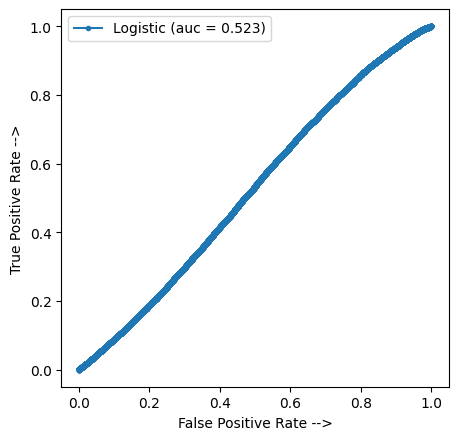

In [27]:
from sklearn.metrics import roc_curve, auc

y_pred_logistic_tsvd = Lg_tsvd.decision_function(X_test_tsvd)

logistic_fpr_tsvd, logistic_tpr_tsvd, threshold = roc_curve(y_test.T, y_pred_logistic_tsvd)
auc_logistic_tsvd = auc(logistic_fpr_tsvd, logistic_tpr_tsvd)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr_tsvd, logistic_tpr_tsvd, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic_tsvd)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## ROC-AUC Score of Logistic Regression with TruncatedSVD dimensionality Reduction is 0.523 & Accuracy 0.54989